In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#1.데이터 불러오기

In [ ]:
hospital = pd.read_csv("train.csv")

In [ ]:
hospital.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


변수들이 너무 많아 보기어렵다.

중요하다고 생각하는 변수 10개만 선정하여 학습 진행

- 종속변수:
OC- 개점 폐점

- 독립변수 :
 
openDate - 병워너 설립일

bedCoount- 병원이 가진 병상의 수

revenue1 - 매출액 2017

salescost1 - 매출 원가

sga1- 관리비

salary- 급여

liquidAsset1 - 유동자산

nonCAsset1 - 비유동자산

netAsset1 - 순자산총계

surplus1- 이익잉여금




In [ ]:
hospital_train = hospital[['openDate','bedCount','revenue1','salescost1','sga1','salary1','liquidAsset1','nonCAsset1','netAsset1','surplus1']]

In [ ]:
hospital_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   openDate      301 non-null    int64  
 1   bedCount      296 non-null    float64
 2   revenue1      293 non-null    float64
 3   salescost1    293 non-null    float64
 4   sga1          293 non-null    float64
 5   salary1       293 non-null    float64
 6   liquidAsset1  293 non-null    float64
 7   nonCAsset1    293 non-null    float64
 8   netAsset1     293 non-null    float64
 9   surplus1      293 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


#2. 데이터 전처리

#1) 결측치 확인

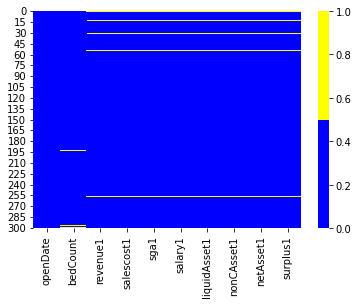

In [ ]:
import seaborn as sns

cols = hospital_train.columns[:10] 
colours = ['blue', 'yellow'] # 노랑 - 누락. 파랑 - 정상.
sns.heatmap(hospital_train[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in hospital_train.columns:
    pct_missing = np.mean(hospital_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

openDate - 0%
bedCount - 2%
revenue1 - 3%
salescost1 - 3%
sga1 - 3%
salary1 - 3%
liquidAsset1 - 3%
nonCAsset1 - 3%
netAsset1 - 3%
surplus1 - 3%


#2) 누락 데이터 대체

In [ ]:
# fillna() 로 누락 데이터 대체- bedCount
med = hospital_train['bedCount'].median()
print(med)
hospital_train['bedCount'] = hospital_train['bedCount'].fillna(med)

136.5


<ipython-input-8-dd3eb38b247f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['bedCount'] = hospital_train['bedCount'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- revenue1
med = hospital_train['revenue1'].median()
print(med)
hospital_train['revenue1'] = hospital_train['revenue1'].fillna(med)

5524218104.0


<ipython-input-9-d309c147b137>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['revenue1'] = hospital_train['revenue1'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- salescost1
med = hospital_train['salescost1'].median()
print(med)
hospital_train['salescost1'] = hospital_train['salescost1'].fillna(med)

210410492.0


<ipython-input-10-e210949a703e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['salescost1'] = hospital_train['salescost1'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- sga1
med = hospital_train['sga1'].median()
print(med)
hospital_train['sga1'] = hospital_train['sga1'].fillna(med)

4684074465.0


<ipython-input-11-85df2051bfa7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['sga1'] = hospital_train['sga1'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- salary1
med = hospital_train['salary1'].median()
print(med)
hospital_train['salary1'] = hospital_train['salary1'].fillna(med)

2659892367.0


<ipython-input-12-10198b0504b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['salary1'] = hospital_train['salary1'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- liquidAsset1
med = hospital_train['liquidAsset1'].median()
print(med)
hospital_train['liquidAsset1'] = hospital_train['liquidAsset1'].fillna(med)

1516732005.0


<ipython-input-13-de36a4600ecc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['liquidAsset1'] = hospital_train['liquidAsset1'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- nonCAsset1
med = hospital_train['nonCAsset1'].median()
print(med)
hospital_train['nonCAsset1'] = hospital_train['nonCAsset1'].fillna(med)

6100798930.0


<ipython-input-14-71c7cecb8242>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['nonCAsset1'] = hospital_train['nonCAsset1'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- netAsset1
med = hospital_train['netAsset1'].median()
print(med)
hospital_train['netAsset1'] = hospital_train['netAsset1'].fillna(med)

3033906841.0


<ipython-input-15-ad29f9aa7b67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['netAsset1'] = hospital_train['netAsset1'].fillna(med)


In [ ]:
# fillna() 로 누락 데이터 대체- surplus1
med = hospital_train['surplus1'].median()
print(med)
hospital_train['surplus1'] = hospital_train['surplus1'].fillna(med)

0.0


<ipython-input-16-9d085feea049>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_train['surplus1'] = hospital_train['surplus1'].fillna(med)


#3)결측값 제거 이후

In [ ]:
for col in hospital_train.columns:
    pct_missing = np.mean(hospital_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

openDate - 0%
bedCount - 0%
revenue1 - 0%
salescost1 - 0%
sga1 - 0%
salary1 - 0%
liquidAsset1 - 0%
nonCAsset1 - 0%
netAsset1 - 0%
surplus1 - 0%


In [ ]:
hospital_train.head()

,openDate,bedCount,revenue1,salescost1,sga1,salary1,liquidAsset1,nonCAsset1,netAsset1,surplus1
0,20071228,175.0,4.217530e+09,0.0,3.961135e+09,2.033835e+09,1.012700e+09,2.514586e+09,2.844460e+09,1.496394e+09
1,19970401,410.0,5.524218e+09,210410492.0,4.684074e+09,2.659892e+09,1.516732e+09,6.100799e+09,3.033907e+09,0.000000e+00
2,20161228,468.0,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,2.724421e+08,1.204810e+08,3.005088e+08,0.000000e+00
3,20000814,353.0,7.250734e+10,0.0,7.067740e+10,3.178605e+10,1.304154e+10,4.317936e+10,1.385710e+10,8.643659e+09
4,20050901,196.0,4.904354e+10,0.0,4.765605e+10,2.446078e+10,6.317084e+09,4.366733e+10,8.631164e+07,9.025550e+09


In [ ]:
hospital_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   openDate      301 non-null    int64  
 1   bedCount      301 non-null    float64
 2   revenue1      301 non-null    float64
 3   salescost1    301 non-null    float64
 4   sga1          301 non-null    float64
 5   salary1       301 non-null    float64
 6   liquidAsset1  301 non-null    float64
 7   nonCAsset1    301 non-null    float64
 8   netAsset1     301 non-null    float64
 9   surplus1      301 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


#5) 변수간 상관계수(피어슨)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2442e2910>,
      dtype=object)

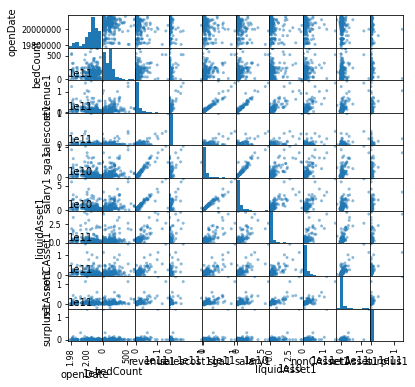

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(hospital_train, figsize = (6, 6))

In [ ]:
hospital_train.corr(method='pearson')

,openDate,bedCount,revenue1,salescost1,sga1,salary1,liquidAsset1,nonCAsset1,netAsset1,surplus1
openDate,1.000000,0.019436,-0.266368,-0.163878,-0.284081,-0.305512,-0.243001,-0.172283,-0.138971,-0.091178
bedCount,0.019436,1.000000,0.276335,0.072904,0.335049,0.388037,0.160007,0.322172,0.189878,-0.029850
revenue1,-0.266368,0.276335,1.000000,0.764234,0.948886,0.888141,0.849983,0.768040,0.656632,0.332471
salescost1,-0.163878,0.072904,0.764234,1.000000,0.530659,0.443644,0.648768,0.422516,0.428111,0.141947
sga1,-0.284081,0.335049,0.948886,0.530659,1.000000,0.965322,0.787038,0.807716,0.651683,0.361857
salary1,-0.305512,0.388037,0.888141,0.443644,0.965322,1.000000,0.709409,0.821818,0.637393,0.312233
liquidAsset1,-0.243001,0.160007,0.849983,0.648768,0.787038,0.709409,1.000000,0.680242,0.736502,0.403590
nonCAsset1,-0.172283,0.322172,0.768040,0.422516,0.807716,0.821818,0.680242,1.000000,0.821617,0.440357
netAsset1,-0.138971,0.189878,0.656632,0.428111,0.651683,0.637393,0.736502,0.821617,1.000000,0.658646
surplus1,-0.091178,-0.029850,0.332471,0.141947,0.361857,0.312233,0.403590,0.440357,0.658646,1.000000


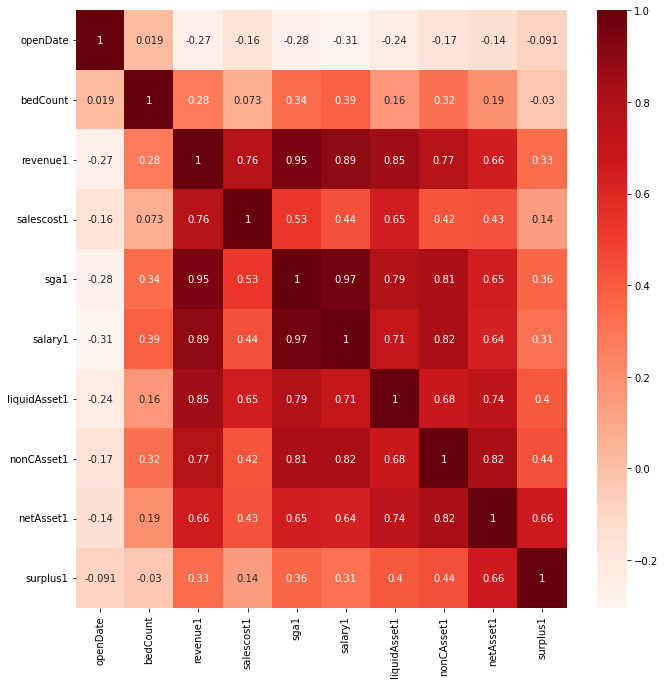

In [ ]:
import seaborn as sns

plt.figure(figsize=(11,11))
cor = hospital_train.corr()
sns.heatmap(cor,annot = True, cmap=plt.cm.Reds)
plt.show()

#6)피어슨 상관계수가 너무 높은 변수 sga1 삭제

In [ ]:
hospital_train = hospital_train.drop(['sga1'],axis=1)

In [ ]:
hospital_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   openDate      301 non-null    int64  
 1   bedCount      301 non-null    float64
 2   revenue1      301 non-null    float64
 3   salescost1    301 non-null    float64
 4   salary1       301 non-null    float64
 5   liquidAsset1  301 non-null    float64
 6   nonCAsset1    301 non-null    float64
 7   netAsset1     301 non-null    float64
 8   surplus1      301 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 21.3 KB


#7) 변수 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(hospital_train))
X_s.head()
X_ohe = pd.get_dummies(X_s)
X_ohe.head()

,0,1,2,3,4,5,6,7,8
0,0.237663,0.250076,-0.420024,-0.267479,-0.443912,-0.398431,-0.518766,-0.241743,0.032499
1,-0.897900,2.246024,-0.355215,-0.238866,-0.365420,-0.317133,-0.306176,-0.226561,-0.151636
2,1.251288,2.738641,-0.579380,-0.197380,-0.661741,-0.517831,-0.660689,-0.445611,-0.151636
3,-0.555374,1.761900,2.966971,-0.267479,3.286244,1.541760,1.891841,0.640794,0.911987
4,0.008731,0.428437,1.803228,-0.267479,2.367846,0.457139,1.920768,-0.462777,0.958979


#2-1. train_X,y 할당


In [ ]:
X=hospital_train
y= hospital['OC']

In [ ]:
X.shape, y.shape

((301, 9), (301,))

In [ ]:
X.head(5)

,openDate,bedCount,revenue1,salescost1,salary1,liquidAsset1,nonCAsset1,netAsset1,surplus1
0,20071228,175.0,4.217530e+09,0.0,2.033835e+09,1.012700e+09,2.514586e+09,2.844460e+09,1.496394e+09
1,19970401,410.0,5.524218e+09,210410492.0,2.659892e+09,1.516732e+09,6.100799e+09,3.033907e+09,0.000000e+00
2,20161228,468.0,1.004522e+09,515483669.0,2.964023e+08,2.724421e+08,1.204810e+08,3.005088e+08,0.000000e+00
3,20000814,353.0,7.250734e+10,0.0,3.178605e+10,1.304154e+10,4.317936e+10,1.385710e+10,8.643659e+09
4,20050901,196.0,4.904354e+10,0.0,2.446078e+10,6.317084e+09,4.366733e+10,8.631164e+07,9.025550e+09


In [ ]:
y.head(5)

0    open
1    open
2    open
3    open
4    open
Name: OC, dtype: object

- onehotencoding

In [ ]:
y = pd.get_dummies(y)
y.head()

,close,open
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#2-2. test 할당: X_test,y_test

In [ ]:
hospital = pd.read_csv("test.csv")

In [ ]:
X_test = hospital[['openDate','bedCount','revenue1','salescost1','sga1','salary1','liquidAsset1','nonCAsset1','netAsset1','surplus1']]

In [ ]:
y_test = hospital[['OC']]

In [ ]:
X_test.head()

,openDate,bedCount,revenue1,salescost1,sga1,salary1,liquidAsset1,nonCAsset1,netAsset1,surplus1
0,19981125.0,300.0,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,2.591385e+10,4.807282e+10,6.295769e+09,8.944587e+09
1,20160309.0,44.0,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,5.861727e+09,7.511010e+10,1.470447e+10,1.046277e+10
2,19890427.0,276.0,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.265313e+10,2.945467e+10,0.000000e+00,1.638540e+10
3,20100226.0,363.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.644533e+09,6.730264e+10,4.702837e+10,0.000000e+00
4,20040604.0,213.0,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,7.849772e+09,6.404854e+10,2.268194e+10,1.492691e+10


#3-1) Logistic Regression

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)

In [ ]:
softmax_reg.fit(X,y)

ValueError: ignored

#3-2) SVM

#나이브베이스학습

모형 학습 및 예측

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X,y)
y_pred = gnb.predict(X_test) 
y_pred

ValueError: ignored

성과측정(정확도)

In [ ]:
gnb.score(X_test,y_test)

log loss 계산해 보기

In [ ]:
y_prob = gnb.predict_proba(X_test)

from sklearn.metrics import log_loss

log_loss(y_test, y_prob)

5겹 교차검증

In [ ]:
gnb = GaussianNB() 

scores = cross_val_score(gnb, X, y, scoring='roc_auc', cv=5)
scores.mean()

# SVM학습

In [55]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

linear_svm = LinearSVC(C=1, max_iter = 10000)
linear_svm.fit(X,y)

ValueError: ignored

In [ ]:
print("Predictions: {}".format(linear_svm.predict(X_test))) 
print("Accuracy: {}".format(linear_svm.score(X_test, y_test)))

In [ ]:
linear_svm = LinearSVC(C=1)
scores = cross_val_score(linear_svm, X_test, y_test, scoring='roc_auc',cv=5)
scores.mean()

#다항식 커널

In [59]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5) 

In [60]:
svm_clf.fit(X,y)

ValueError: ignored

In [ ]:
y_pred = svm_clf.predict(X_test)
print("Accuracy: {}".format(svm_clf.score(X_test, y_test)))

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
recall_score(y_test,y_pred)

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
scores = cross_val_score(svm_clf, X, y, scoring='roc_auc',cv=5)
scores.mean()

# rbf 커널

In [61]:
rbf_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001) 

In [62]:
rbf_svm_clf.fit(X,y)

ValueError: ignored

In [ ]:
y_pred = rbf_svm_clf.predict(X_test)
print("Accuracy: {}".format(rbf_svm_clf.score(X_test, y_test)))

In [ ]:
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)

In [ ]:
scores = cross_val_score(rbf_svm_clf, X, y, scoring='roc_auc',cv=5)
scores.mean()